read excel as dataframe

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
s = pd.read_excel(r"D:\MIT\STARmap\GFP-mCherry\20210327+0413_protein\sc_protein_3_replicates.xlsx",sheet_name = 7)
s2 = s.copy(deep = True) # make a copy of s

determine the cutoff for transfection efficiency
cutoff = 10 * mean(negative control)

In [2]:
well = s["Well"]
name = s["Name"]
index = s["Index"]
time = s["Time"]
mCherry = s["Intensity_IntegratedIntensity_mCherry"]
length = len(well)
ctrl1 = s.loc[s["Index"] == 16,:]
ctrl2 = s.loc[s["Index"] == 17,:]
ctrl_mCherry1 = ctrl1["Intensity_IntegratedIntensity_mCherry"]
ctrl_mCherry2 = ctrl2["Intensity_IntegratedIntensity_mCherry"]
ctrl_mCherry = ctrl_mCherry1+ctrl_mCherry2
print(ctrl_mCherry1)
print(ctrl_mCherry2)
print(ctrl_mCherry)
# cutoff = 10*np.mean(ctrl_mCherry) # does not work
cutoff = 10*(np.sum(ctrl_mCherry1)+np.sum(ctrl_mCherry2))/(len(ctrl_mCherry1)+len(ctrl_mCherry2))
print(cutoff)

29981     0.117647
29982     0.152941
29983     0.078431
29984     0.121569
29985     0.090196
            ...   
442294    1.600000
442295    0.403922
442296    0.992157
442297    1.184314
442298    1.231373
Name: Intensity_IntegratedIntensity_mCherry, Length: 24238, dtype: float64
32649     0.082353
32650     0.054902
32651     0.039216
32652     0.070588
32653     0.031373
            ...   
444428    1.109804
444429    1.333333
444430    1.635294
444431    2.937255
444432    1.070588
Name: Intensity_IntegratedIntensity_mCherry, Length: 22618, dtype: float64
29981    NaN
29982    NaN
29983    NaN
29984    NaN
29985    NaN
          ..
444428   NaN
444429   NaN
444430   NaN
444431   NaN
444432   NaN
Name: Intensity_IntegratedIntensity_mCherry, Length: 46856, dtype: float64
7.7664503091374755


1. count transfected cells
2. exclude untransgected cells
3. calculate transfection efficiencies
4. calculate the mean and median values of GFP/mCherry of each well
5. normalize mean and median values to control

In [3]:
total_index_num = 17

index_count = np.zeros(total_index_num) # number of cells in each sample (3 replicates)
index_count_good = np.zeros(total_index_num) # number of transfected cells in each sample (3 replicates)
cutoff_list = np.zeros(total_index_num)
sc_mean = np.zeros(total_index_num)
sc_median = np.zeros(total_index_num)
sc_mean_norm = np.zeros(total_index_num) # normalized to ligation condition only
sc_median_norm = np.zeros(total_index_num) # normalized to ligation condition only
std = np.zeros(total_index_num) # standard deviation

cutoff1 = 2.06078979602008
cutoff2 = 6.95802771835958
cutoff3 = 12.2630367546115

# for i in range(length):
#     index_count[index[i]-1] = index_count[index[i]-1]+1
#     if mCherry[i] > cutoff:
#         index_count_good[index[i]-1] = index_count_good[index[i]-1]+1
#     if mCherry[i] <= cutoff:
#         s["Intensity_IntegratedIntensity_mCherry"][i] = -1 # label untransfeced cells
#     if (name[i] == 'Transfection only') or (name[i] == 'WT cells only') or (name[i] == 'mCherry only'):
#         s["Intensity_IntegratedIntensity_mCherry"][i] = -1 # label negative controls (Transfection only and WT cells only)

for i in range(length):
    index_count[index[i]-1] = index_count[index[i]-1]+1
    if time[i] == "(24hr)":
        if mCherry[i] > cutoff1:
            index_count_good[index[i]-1] = index_count_good[index[i]-1]+1
        if mCherry[i] <= cutoff1:
            s["Intensity_IntegratedIntensity_mCherry"][i] = -1
    if time[i] == "(48hr)":
        if mCherry[i] > cutoff2:
            index_count_good[index[i]-1] = index_count_good[index[i]-1]+1
        if mCherry[i] <= cutoff2:
            s["Intensity_IntegratedIntensity_mCherry"][i] = -1
    if time[i] == "(72hr)":
        if mCherry[i] > cutoff3:
            index_count_good[index[i]-1] = index_count_good[index[i]-1]+1
        if mCherry[i] <= cutoff3:
            s["Intensity_IntegratedIntensity_mCherry"][i] = -1
    if (name[i] == 'Transfection only') or (name[i] == 'WT cells only') or (name[i] == 'mCherry only'):
        s["Intensity_IntegratedIntensity_mCherry"][i] = -1 # label controls (mCherry only and Transfection only and WT cells only)
        
# eff = np.zeros(total_index_num)
# for j in range(total_index_num):
#     eff[j] =  index_count_good[j]/index_count[j]   
# print(index_count)
# print(index_count_good)
# print(eff)

for k in range(len(cutoff_list)):
    cutoff_list[k-1] = cutoff

# s.drop(index = (s.loc[(s['Intensity_IntegratedIntensity_mCherry'] == '-1')].index),inplace = True) # does not work
s = s.loc[s['Intensity_IntegratedIntensity_mCherry'] != -1,:] # exclude untransfected cells

for j in range(total_index_num):
    ss = s.loc[s["Index"] == j+1,:]
    sc_mean[j] = np.mean(ss["GFP/mCherry"])
    sc_median[j] = np.median(ss["GFP/mCherry"])
    std[j] = np.std(ss["GFP/mCherry"])

for j in range(total_index_num):
    # sc_mean_norm[j] = sc_mean[j]/sc_mean[1]
    # sc_median_norm[j] = sc_median[j]/sc_median[1]
    # std[j] = std[j]/sc_mean[1]
    sc_mean_norm[j] = sc_mean[j]-sc_mean[1]
    sc_median_norm[j] = sc_median[j]-sc_median[1]

print(sc_mean)
print(sc_median)    
print(sc_mean_norm)
print(sc_median_norm)
print(std)

<ipython-input-3-ff984d49d2a7>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s["Intensity_IntegratedIntensity_mCherry"][i] = -1
<ipython-input-3-ff984d49d2a7>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s["Intensity_IntegratedIntensity_mCherry"][i] = -1
<ipython-input-3-ff984d49d2a7>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s["Intensity_IntegratedIntensity_mCherry"][i] = -1


[1.27306206 1.06424164 1.63509709 2.96505867 2.52276896 2.98095551
 1.56540297 1.60322782 1.70984887 2.7870368  3.58612281 2.68168245
 3.11474689 3.04889811 0.01266511 2.56197606 0.63630483]
[1.04428216 0.90721885 1.31487243 2.34740712 1.90396496 2.28681772
 1.34606293 1.34384127 1.19342891 2.28265204 2.67675544 1.74454704
 2.10966641 1.90330064 0.00893064 2.44607185 0.63630483]
[ 0.20882042  0.          0.57085545  1.90081703  1.45852732  1.91671387
  0.50116133  0.53898618  0.64560723  1.72279516  2.52188116  1.61744081
  2.05050525  1.98465647 -1.05157653  1.49773442 -0.42793681]
[ 0.1370633   0.          0.40765358  1.44018826  0.99674611  1.37959886
  0.43884408  0.43662242  0.28621006  1.37543318  1.76953658  0.83732818
  1.20244755  0.99608179 -0.89828821  1.53885299 -0.27091403]
[0.98213199 0.77149905 1.34192569 2.47139732 2.28625064 2.59877401
 1.14436207 1.21098733 1.62312117 2.24563019 3.21901341 2.75115664
 3.11596737 3.39346932 0.01496315 0.9206168  0.29770028]


generate and save violin plots

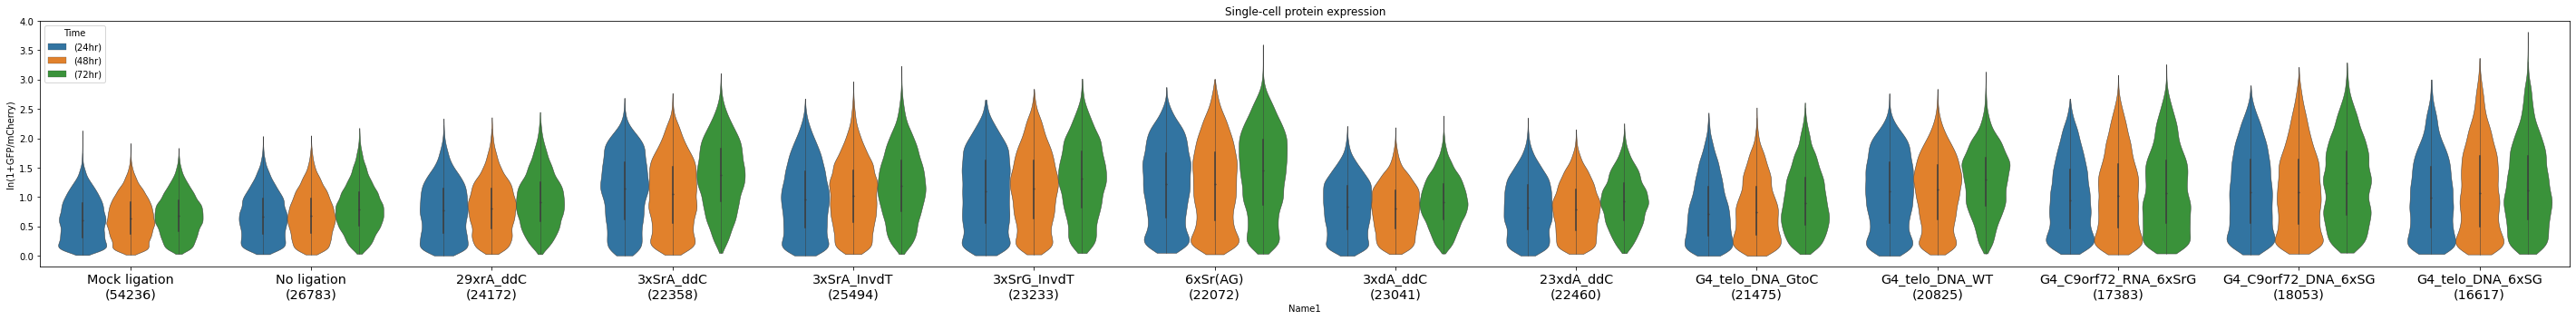

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(50,5))
plt.title("Single-cell protein expression")
# p1 = sns.violinplot(x = s["Name"],y = s["log1p(GFP/mCherry)"],width = 0.8,palette = ["darkgrey","darkgrey","darkgrey","darkgrey","darkgrey","darkgrey","darkgoldenrod","darkgoldenrod","darkgoldenrod","palevioletred","palevioletred","palevioletred","palevioletred","palevioletred","palevioletred","palevioletred","palevioletred","palevioletred","palevioletred","palevioletred","palevioletred","c","c","c","c","c","c","mediumpurple","mediumpurple","mediumpurple","mediumpurple","mediumpurple","mediumpurple","palegreen","palegreen","palegreen","palegreen","palegreen","palegreen","palegreen","palegreen","palegreen"],order = ["Mock ligation(24hr)","Mock ligation(48hr)","Mock ligation(72hr)","No ligation(24hr)","No ligation(48hr)","No ligation(72hr)","29xrA_ddC(24hr)","29xrA_ddC(48hr)","29xrA_ddC(72hr)","3xSrA_ddC(24hr)","3xSrA_ddC(48hr)","3xSrA_ddC(72hr)","3xSrA_InvdT(24hr)","3xSrA_InvdT(48hr)","3xSrA_InvdT(72hr)","3xSrG_InvdT(24hr)","3xSrG_InvdT(48hr)","3xSrG_InvdT(72hr)","6xSr(AG)(24hr)","6xSr(AG)(48hr)","6xSr(AG)(72hr)","3xdA_ddC(24hr)","3xdA_ddC(48hr)","3xdA_ddC(72hr)","23xdA_ddC(24hr)","23xdA_ddC(48hr)","23xdA_ddC(72hr)","G4_telo_DNA_GtoC(24hr)","G4_telo_DNA_GtoC(48hr)","G4_telo_DNA_GtoC(72hr)","G4_telo_DNA_WT(24hr)","G4_telo_DNA_WT(48hr)","G4_telo_DNA_WT(72hr)","G4_C9orf72_RNA_6xSrG(24hr)","G4_C9orf72_RNA_6xSrG(48hr)","G4_C9orf72_RNA_6xSrG(72hr)","G4_C9orf72_DNA_6xSG(24hr)","G4_C9orf72_DNA_6xSG(48hr)","G4_C9orf72_DNA_6xSG(72hr)","G4_telo_DNA_6xSG(24hr)","G4_telo_DNA_6xSG(48hr)","G4_telo_DNA_6xSG(72hr)"],scale = "width",inner = "box")
## p1 = sns.violinplot(x = s["Name"],y = s["GFP/mCherry"],hue = s["Time"],width = 0.8,palette = ["darkgrey","darkgrey","darkgoldenrod","palevioletred","palevioletred","palevioletred","palevioletred","c","c","mediumpurple","mediumpurple","palegreen","palegreen","palegreen"],order = ["Mock ligation","No ligation","29xrA_ddC","3xSrA_ddC","3xSrA_InvdT","3xSrG_InvdT","6xSr(AG)","3xdA_ddC","23xdA_ddC","G4_telo_DNA_GtoC","G4_telo_DNA_WT","G4_C9orf72_RNA_6xSrG","G4_C9orf72_DNA_6xSG","G4_telo_DNA_6xSG"],scale = "width",inner = "box",cut = 0)
p1 = sns.violinplot(x = s["Name1"],y = s["log1p(GFP/mCherry)"],hue = s["Time"],linewidth = 0.5,width = 0.8,order = ["Mock ligation","No ligation","29xrA_ddC","3xSrA_ddC","3xSrA_InvdT","3xSrG_InvdT","6xSr(AG)","3xdA_ddC","23xdA_ddC","G4_telo_DNA_GtoC","G4_telo_DNA_WT","G4_C9orf72_RNA_6xSrG","G4_C9orf72_DNA_6xSG","G4_telo_DNA_6xSG"],scale = "width",inner = "box",cut = 0)
plt.ylabel('ln(1+GFP/mCherry)')
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13],["Mock ligation\n(%d)"%(index_count_good[1]),"No ligation\n(%d)"%(index_count_good[0]),"29xrA_ddC\n(%d)"%(index_count_good[2]),"3xSrA_ddC\n(%d)"%(index_count_good[3]),"3xSrA_InvdT\n(%d)"%(index_count_good[4]),"3xSrG_InvdT\n(%d)"%(index_count_good[5]),"6xSr(AG)\n(%d)"%(index_count_good[10]),"3xdA_ddC\n(%d)"%(index_count_good[6]),"23xdA_ddC\n(%d)"%(index_count_good[7]),"G4_telo_DNA_GtoC\n(%d)"%(index_count_good[8]),"G4_telo_DNA_WT\n(%d)"%(index_count_good[9]),"G4_C9orf72_RNA_6xSrG\n(%d)"%(index_count_good[11]),"G4_C9orf72_DNA_6xSG\n(%d)"%(index_count_good[12]),"G4_telo_DNA_6xSG\n(%d)"%(index_count_good[13])],fontsize = "x-large")
plt.savefig(r'D:\MIT\STARmap\GFP-mCherry\20210327+0413_protein\all_log1p_norm_violinplot.png')
plt.savefig(r'D:\MIT\STARmap\GFP-mCherry\20210327+0413_protein\all_log1p_norm_violinplot.svg',format = "svg")
plt.show()

generate and save scatter plots of each well

In [5]:
# i = 0
# for j in well_count:
#     plt.scatter(x = s2["Intensity_IntegratedIntensity_mCherry"][i:i+int(j)],y = s2["Intensity_IntegratedIntensity_GFP"][i:i+int(j)],s=1,c='orangered')
#     plt.title(s2["Name"][i])
#     plt.xlabel('mCherry intensity')
#     plt.ylabel('GFP intensity')
#     plt.xlim(0,2000)
#     plt.ylim(0,2000)
#     plt.savefig(r"D:\MIT\STARmap\GFP-mCherry\20210327_protein\20210329-72hr-RAW\72hrs-scatter\%d.png"%(s2["Well"][i]))
#     plt.show()
#     i = i+int(j)

export transfection data and mean and median values of GFP/mCherry to excel

In [6]:
# list_output = [index_count,index_count_good,eff,cutoff_list,sc_mean,sc_median,sc_mean_norm,sc_median_norm,std]
# df_output = pd.DataFrame(list_output)
# df_output.to_excel(r"D:\MIT\STARmap\GFP-mCherry\20210327+0413_protein\allsample.xlsx")